In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# --- 1. CARREGAR OS DADOS PROCESSADOS ---
caminho_dados = r"E:\Estudos_Cybersecurity\Datasets_Cybersecurity\train_ready.csv"

print("⏳ Carregando dataset processado...")
df = pd.read_csv(caminho_dados)

# Separar X (dados para análise) e y (gabarito)
X = df.drop('target', axis=1)  # Tudo menos a resposta
y = df['target']               # Só a resposta (0 ou 1)

print(f"📊 Dados carregados! Features: {X.shape[1]} | Linhas: {X.shape[0]}")

# --- 2. DIVISÃO TREINO vs TESTE ---
# test_size=0.3 significa que 30% será guardado para a prova final
# random_state=42 garante que a divisão seja sempre a mesma (reprodutível)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"✂️ Divisão feita: {len(X_train)} para treino, {len(X_test)} para teste.")

# --- 3. TREINAMENTO (A Mágica) ---
print("\n🌲 Iniciando treinamento da Random Forest... (Isso pode levar um tempinho)")
inicio = time.time()

# n_jobs=-1 usa todos os núcleos do seu processador para ir mais rápido
modelo = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
modelo.fit(X_train, y_train)

fim = time.time()
print(f"✅ Modelo treinado em {fim - inicio:.2f} segundos!")

# --- 4. A PROVA FINAL ---
print("\n📝 Aplicando a prova nos dados de teste...")
previsoes = modelo.predict(X_test)

# Calcular a nota (Acurácia)
acuracia = accuracy_score(y_test, previsoes) * 100
print(f"🏆 Acurácia do Modelo: {acuracia:.2f}%")

⏳ Carregando dataset processado...
📊 Dados carregados! Features: 122 | Linhas: 125973
✂️ Divisão feita: 88181 para treino, 37792 para teste.

🌲 Iniciando treinamento da Random Forest... (Isso pode levar um tempinho)
✅ Modelo treinado em 2.10 segundos!

📝 Aplicando a prova nos dados de teste...
🏆 Acurácia do Modelo: 99.89%


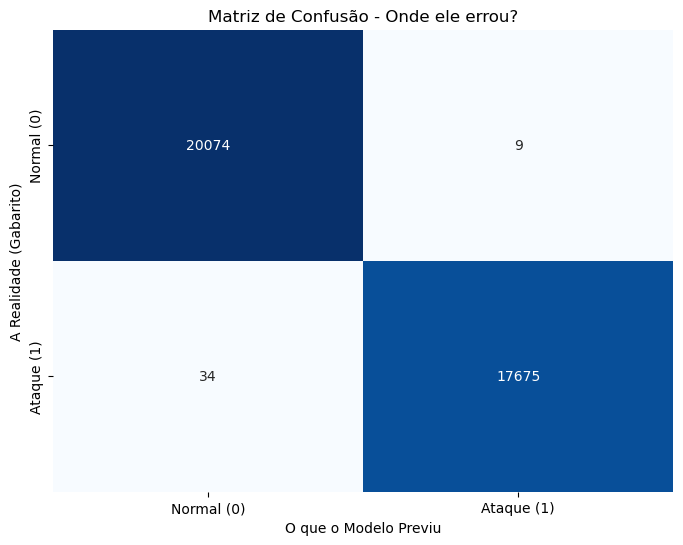


📋 Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     20083
      Ataque       1.00      1.00      1.00     17709

    accuracy                           1.00     37792
   macro avg       1.00      1.00      1.00     37792
weighted avg       1.00      1.00      1.00     37792



In [2]:
# %pip install seaborn  # (Descomente se der erro)
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. GERANDO A MATRIZ ---
matriz = confusion_matrix(y_test, previsoes)

# --- 2. DESENHANDO O MAPA DE CALOR ---
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal (0)', 'Ataque (1)'],
            yticklabels=['Normal (0)', 'Ataque (1)'])

plt.xlabel('O que o Modelo Previu')
plt.ylabel('A Realidade (Gabarito)')
plt.title('Matriz de Confusão - Onde ele errou?')
plt.show()

# --- 3. RELATÓRIO DETALHADO ---
print("\n📋 Relatório de Classificação:")
print(classification_report(y_test, previsoes, target_names=['Normal', 'Ataque']))

In [ ]:
# Imprimir os números brutos da matriz
tn, fp, fn, tp = confusion_matrix(y_test, previsoes).ravel()

print(f"🔒 Bloqueios Corretos (True Positive): {tp}")
print(f"✅ Tráfego Normal liberado (True Negative): {tn}")
print(f"⚠️ Alarme Falso (False Positive): {fp}")
print(f"💀 ATAQUES QUE PASSARAM (False Negative): {fn}")

🔒 Bloqueios Corretos (True Positive): 17675
✅ Tráfego Normal liberado (True Negative): 20074
⚠️ Alarme Falso (False Positive): 9
💀 ATAQUES QUE PASSARAM (False Negative): 34


In [4]:
import joblib
import os

# --- 1. PREPARANDO O ARQUIVO ---
# Criar uma pasta 'Modelos' organizada
pasta_modelo = r"E:\Estudos_Cybersecurity\Modelos"
os.makedirs(pasta_modelo, exist_ok=True)

caminho_modelo = os.path.join(pasta_modelo, "modelo_random_forest_v1.pkl")

# --- 2. SALVANDO O CÉREBRO ---
print("💾 Salvando o modelo no SSD...")
joblib.dump(modelo, caminho_modelo)

print(f"✅ Modelo salvo com sucesso em:\n{caminho_modelo}")
print(f"Tamanho do arquivo: {os.path.getsize(caminho_modelo) / 1024 / 1024:.2f} MB")

💾 Salvando o modelo no SSD...
✅ Modelo salvo com sucesso em:
E:\Estudos_Cybersecurity\Modelos\modelo_random_forest_v1.pkl
Tamanho do arquivo: 7.46 MB
